# Playing with Planet imagery

This notebook contains scratch code for manipulating imagery from Planet. The image files are PlanetScope Analytic SR Ortho Scenes (Product Level 3B) with a 16-bit bit depth. These are the equivalent of raw image files suitable for analytic and scientific analyses.

In [99]:
from IPython.display import Image
import rasterio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from rasterio.plot import show
from osgeo import gdal

We will be working with a single image from Ningde, China in this notebook. 

In [ ]:
# Load PlanetScope 4-band analytic-sr image
filename = "img/20180410_020421_0f31_3B_AnalyticMS_SR.tif"

## Loading Images
First, let's define some helper functions for loading PlanetScope 4-band image scenes

In [92]:
# Load all 4 bands of PlanetScope scene
def load_image4(filename):
    """Return a 4D (r, g, b, nir) numpy array with the data in the specified TIFF filename."""
    with rasterio.open(filename) as src:
        b, g, r, nir = src.read()
        return np.dstack([r, g, b, nir])

# Load just the RGB bands of PlanetScope scene
def load_image3(filename):
    """Return a 3D (r, g, b) numpy array with the data in the specified TIFF filename."""
    with rasterio.open(filename) as src:
        b,g,r,mask = src.read()
        out_image = np.dstack([b, g, r])
        return out_image

Now let's open the image both as an image file and as an `numpy` array using the `load_image3` function defined above

In [93]:
# Load as image raster
imgA = rasterio.open(filename)
# Load as numpy array 
imgB = load_image3("img/20180410_020421_0f31_3B_AnalyticMS_SR.tif")

## Plotting Images

GeoTiffs can be readily plotted with the `rasterio.plot.show` method after reading the opened GeoTiff file with `read()`. However, the PlanetScope4 3B (analytic SR) scenes have not had a color ramp applied and therefore need to be processed before they can be readily visualized as a RGB image.

For example, consider what happens if no color map is applied prior to plotting:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


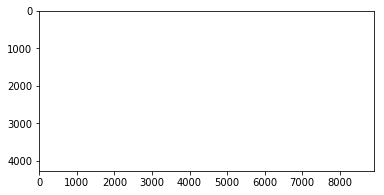

In [95]:
# Plot the second band of the entire image
show(imgA.read())

In this case, pixel values are assumed to be in the 8bit RGB range and are thus clipped to the appropriate range (depending on whether the data type is a `float` or `uint`, see above warning). Because the raw values are outside this range, we get the above uniform image. However, individual bands can be readily plotted because the pixel values for a single band can be normalized.

For example, let's plot the image's red band, which we can do by specifying the band number in the `read` method:

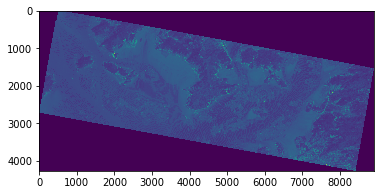

In [96]:
show(imgA.read(2))

To visualize the image as a normal RGB image, we need to scale the 16bit values down to 8bit. This can be accomplished with the `gdal_translate` method with the `scale` option:

In [109]:
#imgB *= 255.0/imgB.max()
imgB.max()
#imgB.dtype

5056

## Creating Image Chips

In [82]:
# Read in a 256x256 subset of the image file
with rasterio.open(filename) as src:
    chip = src.read(2, window=((1000,1256), (1000,1256)))

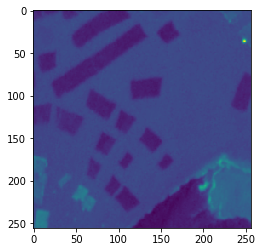

In [84]:
show(chip)